# Titanic Data Set - Statistics Review

[Variable Descriptions](https://www.kaggle.com/c/titanic/data).

In [1]:
% matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


In [2]:
df = pd.read_csv('titanic.csv')

**Describe the data. **
- How big?
- What are the columns and what do they mean?

In [62]:
print("The dataset has " + str(df.shape[0]) + " rows and " + str(df.shape[1]) + " columns.")

print("The column names are:")
print(df.columns)
df["SibSp"].value_counts()

The dataset has 891 rows and 14 columns.
The column names are:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'family',
       'quantile_fare20'],
      dtype='object')


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

### Explanation of column headings (from https://www.kaggle.com/c/titanic/data)

__PassengerID__: ID number randomly assigned to each passenger. Ranges from 1 - 891. 

__Survived__:  if a passanger survived the trip or not.  0 = No; 1 = Yes

__Pclass__:  Ticket class.  1 = 1st, 2 = 2nd, 3 = 3rd.  Proxy for socio-ecomomic class (SSC).

__Name__:  Name of the passenger.  Order is last name, title, first name, middle name, nickname. Married women are named with their husband's name and their full maiden name is given in parentheses afterwards (first name, middle name, maiden last name)

__Sex__:  Sex of the passenger

__Age__:  Age in years of the passenger.  If the passenger was <1 one years old, a fraction is given.  If the age was estimated, it ends in 0.5

__SibSp__:  Number of siblings (brother, sister, stepbrother, and/or stepsister) plus number of spouses (husband or wife) on board.  Fiances and mistresses were ignored.

__Parch__:  Number of parents (mother and/or father) plus the number of children (daughter(s), son(s), stepdaugher(s), and/or stepson(s) on board.  

__Ticket__:  Ticket number

__Fare__:  Cost of the passenger's ticket. 

__Cabin__:  Cabin number

__Embarked__:  Port of embarkation.  C = Cerbourg, Q = Queenstown, S = Southampton

**What’s the average age of:**

- Any Titanic passenger
- A survivor
- A non-surviving first-class passenger
- Male survivors older than 30 from anywhere but Queenstown

In [5]:
mean_age = df["Age"].mean()
print("The average age of a Titanic passenger:  ", mean_age)

#by using groupby
age_by_survival = df.groupby("Survived")["Age"].mean()
print("The average age of a Titanic survivor:  ", age_by_survival.iloc[1])

age_dead_first = df.groupby(["Survived", "Pclass"])["Age"].mean()
print("The average age of a non-surviving first-class passenger: ", age_dead_first.iloc[0])

over30 = df.loc[df["Age"]>30]
over30_noQ = df.loc[df["Embarked"] != "Q"]
over30_noQ_sex_surv = over30_noQ.groupby(["Survived", "Sex"])
over30_noQ_male_surv_meanage = over30_noQ_sex_surv.get_group((1, "male"))["Age"].mean()
print("The average age of a male surviver over 30 from anywhere but Queenstown:  ", over30_noQ_male_surv_meanage)


The average age of a Titanic passenger:   29.69911764705882
The average age of a Titanic survivor:   28.343689655172415
The average age of a non-surviving first-class passenger:  43.6953125
The average age of a male surviver over 30 from anywhere but Queenstown:   27.257282608695654


**For the groups from the previous task, how far (in years) are the average ages from the median ages?**

In [7]:
print("The difference in median and mean age of a Titanic passenger is:")
print(df["Age"].median() - mean_age)

print("The difference in median and mean age of a Titanic survivor is:")
print(df.groupby("Survived")["Age"].median().iloc[0] - age_by_survival.iloc[1])

print("The difference in median and mean age of a non-surviving first-class passenger is:")
print(df.groupby(["Survived", "Pclass"])["Age"].median().iloc[0] - age_dead_first.iloc[0])

print("The difference in median and mean age of a male surviver over 30 from anywhere but Queenstown:")
print(over30_noQ_sex_surv.get_group((1, "male"))["Age"].median() - over30_noQ_male_surv_meanage)


The difference in median and mean age of a Titanic passenger is:
-1.69911764705882
The difference in median and mean age of a Titanic survivor is:
-0.34368965517241534
The difference in median and mean age of a non-surviving first-class passenger is:
1.5546875
The difference in median and mean age of a male surviver over 30 from anywhere but Queenstown:
0.2427173913043461


**What’s the most common:**
- Passenger class
- Port of Embarkation
- Number of siblings or spouses aboard for survivors

In [8]:
print("The most common passenger class is: ")
print(df["Pclass"].value_counts().idxmax())
print("The most common port of embarkation is: ")
print(df["Embarked"].value_counts().idxmax())

df_surv = df.groupby("Survived").get_group(0)
print("The most common number of siblings or spouses aboard for survivors is:")
print(df_surv["SibSp"].value_counts().idxmax())


The most common passenger class is: 
3
The most common port of embarkation is: 
S
The most common number of siblings or spouses aboard for survivors is:
0


**Within what range of standard deviations from the mean (0-1, 1-2, 2-3) is the median ticket price? Is it above or below the mean?**

In [9]:
mean_fare = df["Fare"].mean()
median_fare = df["Fare"].median()
stdev_fare = df["Fare"].std()

print("The mean fare is:  ", mean_fare)
print("The median fare is:  ", median_fare)
print("The standard deviation from the mean is:  ", stdev_fare)

print("The median fare is below the mean and within the 0-1 standard deviation.") 




The mean fare is:   32.2042079685746
The median fare is:   14.4542
The standard deviation from the mean is:   49.693428597180905
The median fare is below the mean and within the 0-1 standard deviation.


**How much more expensive was the 90th percentile ticket than the 5th percentile ticket? Are they the same class?**

In [10]:
print("The difference between the cost of the 90th percentile and 5th percentile tickets was: ")
print(df["Fare"].quantile(0.90) - df["Fare"].quantile(0.05))

print("Class of passengers who paid the 90th percentile fare price:  ")
print(df[df["Fare"]==df["Fare"].quantile(0.90)]["Pclass"])

print("Class of passengers who paid the 5th percentile fare price:  ")
print(df[df["Fare"]==df["Fare"].quantile(0.05)]["Pclass"])

print("The passengers who paid the 90th percentile fare traveled first class while those who paid the 5th percentile fare traveled third class.")


The difference between the cost of the 90th percentile and 5th percentile tickets was: 
70.7333
Class of passengers who paid the 90th percentile fare price:  
275    1
627    1
765    1
Name: Pclass, dtype: int64
Class of passengers who paid the 5th percentile fare price:  
19     3
26     3
203    3
244    3
354    3
522    3
553    3
598    3
661    3
693    3
773    3
875    3
Name: Pclass, dtype: int64
The passengers who paid the 90th percentile fare traveled first class while those who paid the 5th percentile fare traveled third class.


**The highest average ticket price was paid by passengers from which port? Null ports don’t count.**

In [11]:
print("The highest average ticket price was paid by passengers from the port of :", 
      df.groupby("Embarked")["Fare"].mean().idxmax())

The highest average ticket price was paid by passengers from the port of : C


**What is the most common passenger class for each port?**

In [12]:
embarked = df.groupby("Embarked")
embarked.get_group("C")["Pclass"].value_counts().idxmax()
print("The most common passenger class passengers embarking at the Port of Cerbourg:  ",
     embarked.get_group("C")["Pclass"].value_counts().idxmax())
print("The most common passenger class passengers embarking at the Port of Queenstown:  ",
     embarked.get_group("Q")["Pclass"].value_counts().idxmax())
print("The most common passenger class passengers embarking at the Port of Southhampton:  ",
     embarked.get_group("S")["Pclass"].value_counts().idxmax())

The most common passenger class passengers embarking at the Port of Cerbourg:   1
The most common passenger class passengers embarking at the Port of Queenstown:   3
The most common passenger class passengers embarking at the Port of Southhampton:   3


**What fraction of surviving 1st-class males paid lower than double the overall median ticket price?**

In [14]:
surv_pclass_sex= df.groupby(["Survived", "Pclass", "Sex"])
surv_1_male = surv_pclass_sex.get_group((0, 1, "male"))
surv_1_male_less_2med = surv_1_male[surv_1_male["Fare"] < 2*median_fare]

print(round(len(surv_1_male_less_2med)/len(surv_1_male),2), 
      "of surviving 1st-class males paid lower than double the overall median ticket price.")


0.29 of surviving 1st-class males paid lower than double the overall median ticket price.


**How much older/younger was the average surviving passenger with family members than the average non-surviving passenger without them?**

In [16]:
df["family"] = df["SibSp"] + df["Parch"]

In [17]:
fam_df = df[df["family"]>0]
fam_df_surv = fam_df.groupby("Survived").get_group((1))["Age"].mean()
no_fam_df = df[df["family"]==0]
no_fam_surv = no_fam_df.groupby("Survived").get_group((1))["Age"].mean()
diff = round(abs(fam_df["Age"].mean() - no_fam_df["Age"].mean()), 2)

print("The average age of a surviving person with family members (siblings, spouses, kids, or parents aboard was ", diff,
     "years less than a survivor with no family aboard.")

The average age of a surviving person with family members (siblings, spouses, kids, or parents aboard was  5.81 years less than a survivor with no family aboard.


**Display the relationship (i.e. make a plot) between survival rate and the quantile of the ticket price for 20 integer quantiles.**
- To be clearer, what I want is for you to specify 20 quantiles, and for each of those quantiles divide the number of survivors in that quantile by the total number of people in that quantile. That’ll give you the survival rate in that quantile.
- Then plot a line of the survival rate against the ticket fare quantiles.
- Make sure you label your axes.

In [18]:
df["quantile_fare20"] = pd.qcut(df['Fare'], 20, labels=False)

In [19]:
quant_total = df.groupby("quantile_fare20")["PassengerId"].count()
quant_total.rename("Total", inplace=True)

df_surv = df[df["Survived"]==1]
quant_surv = df_surv.groupby("quantile_fare20")["PassengerId"].count()
quant_surv.rename("Survived", inplace=True)

plot_df = pd.concat([quant_surv, quant_total], axis =1)

In [20]:
plot_df["Survival Rate"]=plot_df["Survived"]/plot_df["Total"]
plot_df["Quantile"] = plot_df.index

Text(0.5,1,'Relationship between survival rate and the quantile of the ticket price')

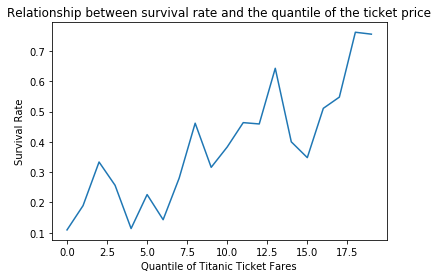

In [21]:
plt.plot(plot_df["Quantile"], plot_df["Survival Rate"])
plt.xlabel("Quantile of Titanic Ticket Fares")
plt.ylabel("Survival Rate")
plt.title("Relationship between survival rate and the quantile of the ticket price")

**For each of the following characteristics, find the median in the data:**
- Age
- Ticket price
- Siblings/spouses
- Parents/children

In [22]:
median_age = df["Age"].median()
median_sibsp = df["SibSp"].median()
median_parch = df["Parch"].median()

print("The median age:  ", median_age)
print("The median ticket price:  ", median_fare)
print("The median number of siblings and/or spouses on board:  ", median_sibsp)
print("The median number of parents and/or children on board:  ", median_parch)

The median age:   28.0
The median ticket price:   14.4542
The median number of siblings and/or spouses on board:   0.0
The median number of parents and/or children on board:   0.0


**If you were to use these medians to draw numerical boundaries separating survivors from non-survivors, which of these characteristics would be the best choice and why?**

In [40]:
survivors = df[df["Survived"]==1]

In [36]:
#Age
df_cleanage = df.copy()
df_cleanage.dropna(subset=["Age"], inplace=True)
df_cleanage["Quantile_age2"]=pd.qcut(df_cleanage["Age"], 2, labels=False)

In [54]:
survivors_cleanage = survivors.copy()
survivors_cleanage.dropna(subset=["Age"], inplace=True)
survivors_cleanage["Quantile_age2"] = pd.qcut(survivors_cleanage["Age"], 2, labels=False)


In [55]:
age2_total = df_cleanage.groupby("Quantile_age2")["PassengerId"].count()
age2_total.rename("Total", inplace=True)

age2_surv = survivors_cleanage.groupby("Quantile_age2")["PassengerId"].count()
age2_surv.rename("Survivors", inplace=True)

age2_df = pd.concat([age2_total, age2_surv], axis=1)
age2_df["Survival Rate"] = age2_df["Survivors"]/age2_df["Total"]
age2_df["Quantile"]=age2_df.index

,Total,Survivors,Survival Rate,Quantile
Quantile_age2,,,,
0,362,148,0.408840,0
1,352,142,0.403409,1


(0, 1)

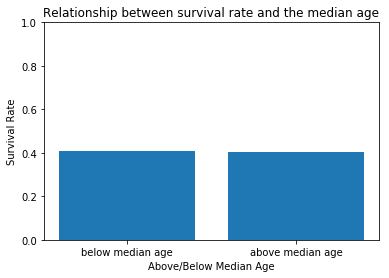

In [60]:
plt.bar(["below median age", "above median age"], age2_df["Survival Rate"])
plt.ylabel("Survival Rate")
plt.title("Relationship between survival rate and the median age")
plt.ylim(0,1)

In [67]:
#Fare
df_fare2 = df.copy()
df_fare2["Quantile_fare2"] = pd.qcut(df_fare2["Fare"], 2, labels=False)

df_surv_fare = survivors.copy()
df_surv_fare["Quantile_fare2"] = pd.qcut(df_surv_fare["Fare"], 2, labels=False)

In [70]:
fare2_total = df_fare2.groupby("Quantile_fare2")["PassengerId"].count()
fare2_total.rename("Total", inplace=True)

fare2_surv = df_surv_fare.groupby("Quantile_fare2")["PassengerId"].count()
fare2_surv.rename("Survivors", inplace=True)

fare2_df = pd.concat([fare2_total, fare2_surv], axis=1)
fare2_df["Survival Rate"] = fare2_df["Survivors"]/fare2_df["Total"]
fare2_df["Quantile"]=fare2_df.index

,Total,Survivors,Survival Rate,Quantile
Quantile_fare2,,,,
0,447,177,0.395973,0
1,444,165,0.371622,1


(0, 1)

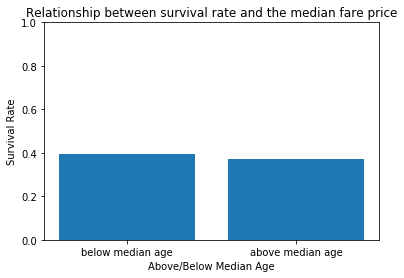

In [71]:
plt.bar(["below median age", "above median age"], fare2_df["Survival Rate"])
plt.ylabel("Survival Rate")
plt.title("Relationship between survival rate and the median fare price")
plt.ylim(0,1)

0.34539473684210525
0.4664310954063604


(0, 1)

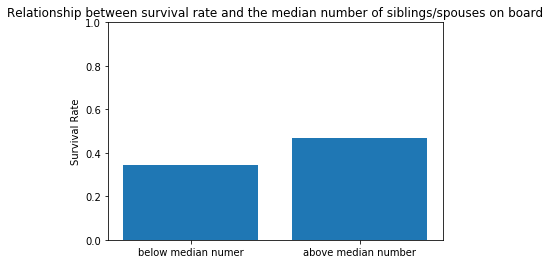

In [84]:
# number of sib/spouses
df_sibsp_0 = df[df["SibSp"]==0]
df_sibsp_not0 = df[df["SibSp"]>0]

#survival rate of those with 0 sib/spouses
surv_rate_0 = df_sibsp_0.groupby("Survived").get_group(1)["PassengerId"].count()/df_sibsp_0["PassengerId"].count()
print(surv_rate_0)

#survival rate of those with 1 or more sib/spouses
surv_rate_not0 = df_sibsp_not0.groupby("Survived").get_group(1)["PassengerId"].count()/df_sibsp_not0["PassengerId"].count()
print(surv_rate_not0)

plt.bar(["below median numer", "above median number"], [surv_rate_0, surv_rate_not0])
plt.ylabel("Survival Rate")
plt.title("Relationship between survival rate and the median number of siblings/spouses on board")
plt.ylim(0,1)


0.34365781710914456
0.5117370892018779


(0, 1)

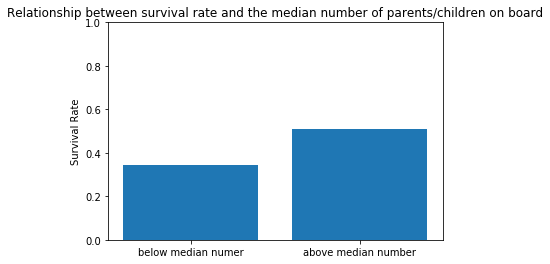

In [85]:
# number of parents/children
df_parch_0 = df[df["Parch"]==0]
df_parch_not0 = df[df["Parch"]>0]

#survival rate of those with 0 sib/spouses
surv_rate_pc0 = df_parch_0.groupby("Survived").get_group(1)["PassengerId"].count()/df_parch_0["PassengerId"].count()
print(surv_rate_pc0)

#survival rate of those with 1 or more sib/spouses
surv_rate_notpc0 = df_parch_not0.groupby("Survived").get_group(1)["PassengerId"].count()/df_parch_not0["PassengerId"].count()
print(surv_rate_notpc0)

plt.bar(["below median numer", "above median number"], [surv_rate_pc0, surv_rate_notpc0])
plt.ylabel("Survival Rate")
plt.title("Relationship between survival rate and the median number of parents/children on board")
plt.ylim(0,1)

### Q:  If you were to use these medians to draw numerical boundaries separating survivors from non-survivors, which of these characteristics would be the best choice and why?

A:  I would chose the median number of parents and children on board which gave the greatest differential in survival rate between passengers with above and below the median number (which was 0). 

**Plot the distribution of passenger ages. Choose visually-meaningful bin sizes and label your axes.**

Text(0.5,1,'Histogram of the age distribution of Titanic passengers')

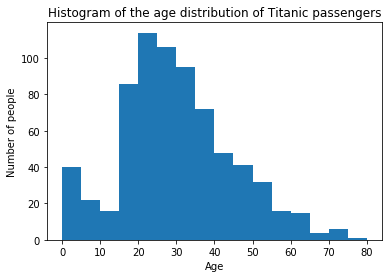

In [90]:
plt.hist(df_cleanage["Age"], bins=([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80]))
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.title("Histogram of the age distribution of Titanic passengers")

**Find the probability that:**
- A passenger survived
- A passenger was male
- A passenger was female and had at least one sibling or spouse on board
- A survivor was from Cherbourg
- A passenger was less than 10 years old
- A passenger was between 25 and 40 years old
- A passenger was either younger than 20 years old or older than 50

In [122]:
print("The probability that a passenger survived is:")
prob_surv = df.groupby("Survived").get_group(1)["Survived"].count()/df["Survived"].count()
print(prob_surv)
print("The probability that a passenger was male is:")
print(df.groupby("Sex").get_group("male")["Sex"].count()/df["Sex"].count())
print("The probability that a passenger was female and had a least on sibling or spouse on board:")
print(df_sibsp_not0.groupby("Sex").get_group("female")["Sex"].count()/df["Sex"].count())
print("The probability that a survivor was from Cherbourg:")
print(df.groupby(["Survived", "Embarked"]).get_group((1,"C"))["Survived"].count()/df["Survived"].count())
print("The probability that a passenger was less than 10 years old: ")
print(df[df.Age < 10]["Age"].count()/df["Age"].count())
print("The probability that a passenger was between 25 and 40 years old:")
print(df[(df.Age > 25) & (df.Age <40)]["Age"].count()/df["Age"].count())
print("The probability that a passenger was either younger than 20 years old or older than 50:")
print(df[(df.Age < 20) | (df.Age > 50)]["Age"].count()/df["Age"].count())


The probability that a passenger survived is:
0.3838383838383838
The probability that a passenger was male is:
0.6475869809203143
The probability that a passenger was female and had a least on sibling or spouse on board:
0.15712682379349047
The probability that a survivor was from Cherbourg:
0.10437710437710437
The probability that a passenger was less than 10 years old: 
0.08683473389355742
The probability that a passenger was between 25 and 40 years old:
0.35014005602240894
The probability that a passenger was either younger than 20 years old or older than 50:
0.31932773109243695


**Knowing nothing else about the passengers aside from the survival rate of the population (see question above), if I choose 100 passengers at random from the passenger list, what’s the probability that exactly 42 passengers survive?**

In [124]:
print("The probability that exactly 42 random passengers out of 100 survive based on a survival probability of 0.38 is:")
print(stats.binom.pmf(k = 42, n = 100, p = prob_surv))

The probability that exactly 42 random passengers out of 100 survive based on a survival probability of 0.38 is:
0.061330411815167886


**What’s the probability that at least 42 of those 100 passengers survive?**

In [125]:
print("The probability that at least 42 random passengers out of 100 survive based on a survival probability of 0.38 is:")
print(stats.binom.cdf(k = 42, n = 100, p = prob_surv))

The probability that at least 42 random passengers out of 100 survive based on a survival probability of 0.38 is:
0.8019231697425527


**Write a function that takes N random samples of 100 passengers, and returns the fraction of those samples where at least 42 passengers survive.**

Choose a random seed and find approximately how many random samples you need to take before your fraction matches the probability you calculated (within Δp≈0.05Δp≈0.05).

It may help to visualize the survival fraction vs the number of random samples. Answers will vary based on the seed.

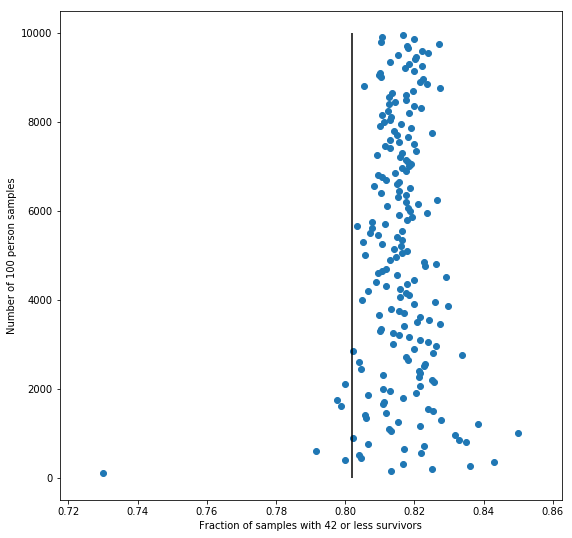

In [164]:
x_list = []
y_list = []
def ran_samples(limit, series):
    for x in range(100, limit, 50):
        tot = 0
        for i in range(1, x):
            sample = series.sample(n=100)
            if sample.sum() <=42:
                tot = tot + 1
        frac_42 = tot/x
        x_list.append(frac_42)
        y_list.append(x)
    return x_list, y_list  

limit = 10000
ran_samples(limit, df["Survived"])
plt.figure(figsize=(9,9))
plt.scatter(x_list, y_list)
plt.xlabel("Fraction of samples with 42 or less survivors")
plt.ylabel("Number of 100 person samples")
plt.vlines(0.8019231697425527, ymin = 0, ymax=limit)
       

Looks like the above ~3000 trials reliably produces a number that agrees with the cdf statistic of 0.8019 (which is marked with the vertical line on the scatterplot. 

**Is there a statistically significant difference between:**
- The ages of male and female survivors?
- The fares paid by passengers from Queenstown and the passengers from Cherbourg?

**If so, at what level? If not, how do you know?**

In [184]:
female_surv = df_cleanage[(df_cleanage.Sex == "female") & (df_cleanage.Survived == 1)]["Age"]
male_surv = df_cleanage[(df_cleanage.Sex == "male") & (df_cleanage.Survived == 1)]["Age"]
print(stats.ttest_ind(a=female_surv, b=male_surv, equal_var=False))

Ttest_indResult(statistic=0.7908966227702466, pvalue=0.4301882393200738)


### no statistically significant difference
Because the pvalue is larger than 0.1, we must accept the null hypotheis that there is no significant difference
between the ages of male and female survivors

In [201]:
Queens = df[df.Embarked == "Q"]["Fare"]
Cher = df[df.Embarked == "C"]["Fare"]
print(stats.ttest_ind(a=Queens, b=Cher, equal_var=False))

Ttest_indResult(statistic=-6.995197104718681, pvalue=4.579203391956742e-11)


### statistically significant difference
Because the pvalue is smaller than 0.01, we can reject the null hypotheis that there is no significant difference
between the fares paid by passengers that departed from Queenstown and Cherbourg.  The small p-value is well
below a significance threshold of 1%. 

**Accompany your p-values with histograms showing the distributions of both compared populations.**

Text(0.5,1,'Distribution of ages of male and female Titanic survivors')

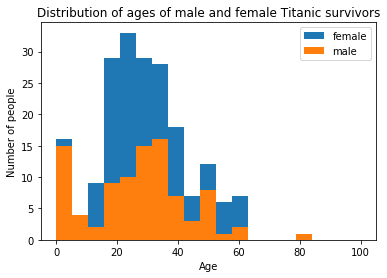

In [210]:
bins = np.linspace(0, 100, 20)

plt.hist(female_surv, bins, label = "female")
plt.hist(male_surv, bins, label = "male")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.title("Distribution of ages of male and female Titanic survivors")

Text(0.5,1,'Distribution of the fares paid by Titantic passengeres that embarked at Queensberg and Cherbourg')

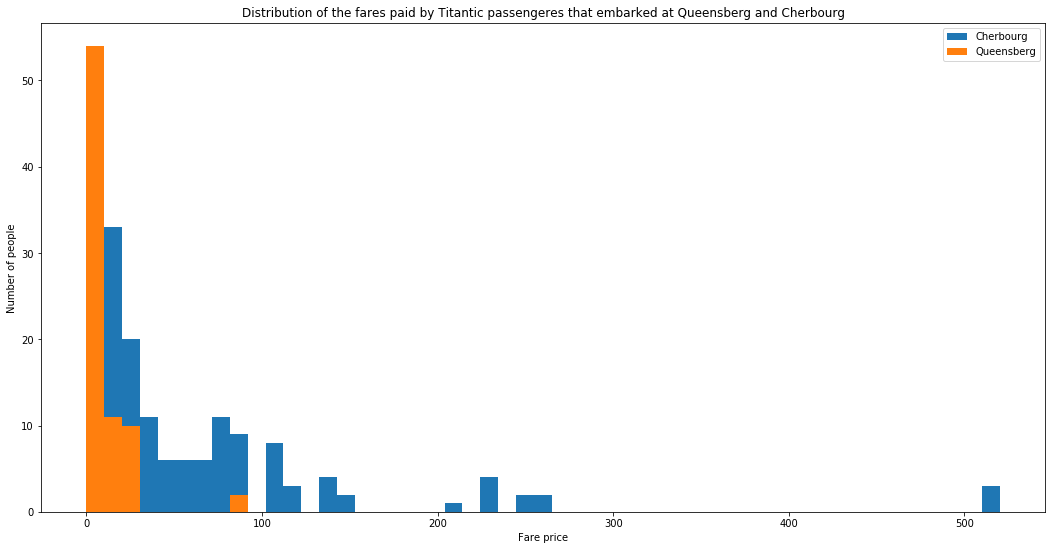

In [213]:
bins = np.linspace(0, 520, 52)

plt.figure(figsize=(18,9))
plt.hist(Cher, bins, label = "Cherbourg")
plt.hist(Queens, bins, label = "Queensberg")
plt.legend()
plt.xlabel("Fare price")
plt.ylabel("Number of people")
plt.title("Distribution of the fares paid by Titantic passengeres that embarked at Queensberg and Cherbourg")

**Did survivors pay more for their tickets than those that did not? If so, to what significance level?**

In [215]:
surv_group = df.groupby("Survived")
surv = surv_group.get_group(1)["Fare"]
no_surv = surv_group.get_group(0)["Fare"]
print(stats.ttest_ind(a=surv, b=no_surv, equal_var=False))


Ttest_indResult(statistic=6.839099259085254, pvalue=2.6993323503141236e-11)


### statistically significant difference
Because the pvalue is smaller than 0.01, we can reject the null hypotheis that there is no significant difference
between the fares paid by passengers that departed from Queenstown and Cherbourg.  The small p-value is well
below a significance threshold of 1%. 

**Did a given first-class passenger have less family members on board than a given third-class passenger? If so, to what significance level?**

In [221]:
class_group = df.groupby("Pclass")
class_1 = class_group.get_group(1)["family"]
class_3 = class_group.get_group(3)["family"]
print(stats.ttest_ind(a=class_1, b=class_3, equal_var=False))

Ttest_indResult(statistic=-2.0799075748873195, pvalue=0.03790738574852193)


### statistically significant difference
Because the pvalue is smaller than 0.05, we can reject the null hypotheis that there is no significant difference
between the fares paid by passengers that departed from Queenstown and Cherbourg.  The p-value indicates a  
significance threshold below 5%, but above 1%. 